# Logistic regression example

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import vi
import pystan

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 24})
figpath='../doc/fig/'

In [2]:
############################
############################
##    data generation     ##
############################
############################

# settings
np.random.seed(520)
N = 100 
true_beta = np.array([2.,3.])

# create data matrix
X = np.ones((N,2))
X[:,1] = -1.+1.5*np.random.randn(N)

# create response variable
eta = X.dot(true_beta)
true_p = 1./(1+np.exp(-eta))
Y = np.random.binomial(1,true_p,N)

Text(0.5, 1.0, 'Response $y$ and probability as function of $\\beta_1$')

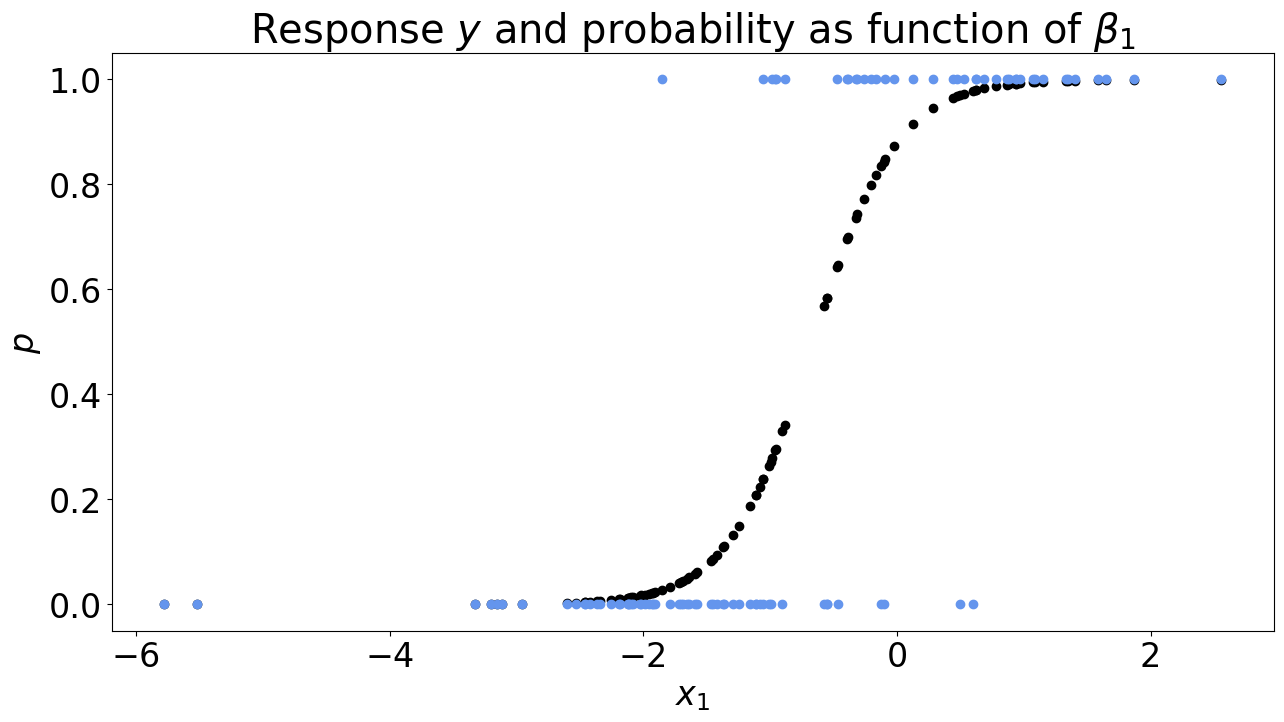

In [3]:
plt.scatter(X[:,1],true_p,c='black')
plt.scatter(X[:,1],Y,c='cornflowerblue')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$p$')
plt.title(r'Response $y$ and probability as function of $\beta_1$')

### Posterior plot

In [4]:
# gaussian log density
def gauss_lp(x,mu,logsigma):
    sigma=np.exp(logsigma)
    return -0.5*((x-mu)/sigma)**2-0.5*logsigma-0.5*np.log(2*np.pi)

In [5]:
############################
############################
## posterior distribution ##
############################
############################
#altY=np.maximum(1e-5,np.minimum(1-1e-5,Y))[:,np.newaxis] # to be able to take logarithms
prbs = lambda beta : 1./(1.+np.exp(-true_beta[0]-beta[:,np.newaxis]*X[:,1]))
ll = lambda beta : np.sum(Y*np.log(prbs(beta))+(1-Y)*np.log(1-prbs(beta)),axis=1)
lprior = lambda beta : gauss_lp(beta,0.,np.log(30.))
lp = lambda beta : ll(beta)+lprior(beta) # target p(x,z)

In [6]:
low,high=-5,10
lsx=np.linspace(low,high,10000)
# estimate normalizing constant
target=np.exp(lp(lsx))
Z=np.sum(target)*(high-low)/lsx.shape[0]
print('Normalizing constant estimate: '+str(Z))

Normalizing constant estimate: 1.8945235584498607e-15


Text(0, 0.5, 'Density')

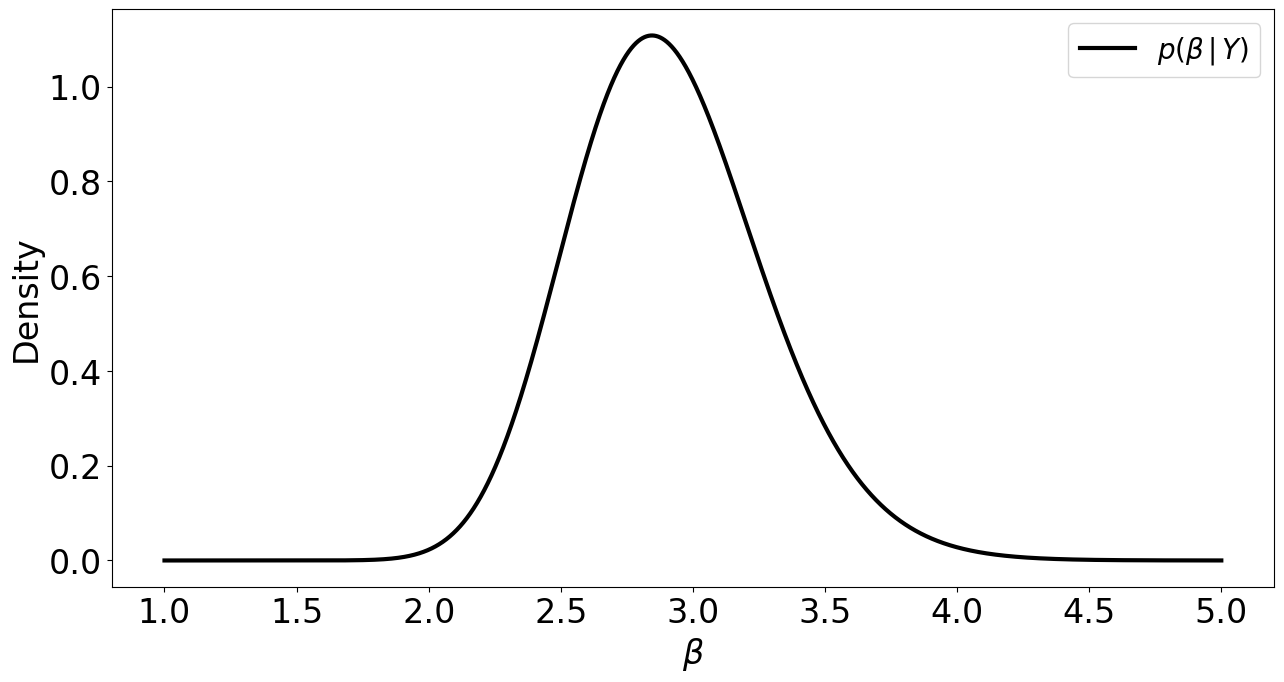

In [7]:
ls=np.linspace(1,5,10000)
target=np.exp(lp(ls))
plt.plot(ls,target/Z,color='black',lw=3,label=r'$p(\beta\,|\,Y)$')
plt.legend(fontsize='small')
plt.xlabel(r'$\beta$')
plt.ylabel('Density')

## Fit model with Stan

In [8]:
# model definition
stan_code = """
data {
  int<lower=0> n; // number of observations
  int y[n]; // responses
  vector[n] x1; // predictors
  real beta0; // intercept
}
parameters {
  real beta1;
}
model {
  beta1 ~ normal(0, 30);
  y ~ bernoulli_logit(beta0+beta1*x1);
}
"""

In [9]:
model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_885816be3a6e229f8e2d0b5893720007 NOW.
In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:836:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948:
/Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/k3/2

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:344:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr.hpp:46:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr/functor/integrate_ode_rk45.hpp:17:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/numeric/odeint.hpp:3

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:846:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan_fit.hpp:15:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::random::linear_congruential_engine<unsigned long lo

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

164 warnings generated.
In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:836:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/ndarraytypes.h:1948:
/Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:344:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr.hpp:46:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/arr/functor/integrate_ode_rk45.hpp:17:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/numeric/odeint.hpp:3

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:846:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan_fit.hpp:15:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::random::linear_congruential_engine<unsigned long lo

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

In file included from /var/folders/k3/24b0dzl557v5m0_0658q2cxr0000gn/T/pystan_muqtdf6g/stanfit4anon_model_885816be3a6e229f8e2d0b5893720007_7404941849691850649.cpp:845:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/giankdiluvi/Library/Python/3.9/lib/python/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Core:420:
/Users/giankd

163 warnings generated.
ld: warning: directory not found for option '-L/usr/local/opt/ruby/lib'
ld: warning: directory not found for option '-L/usr/local/opt/ruby/lib'


In [10]:
# run in stan
stan_data = {'n': N,
             'y': Y,
             'x1': X[:,1],
             'beta0': true_beta[0]}
fit = model.sampling(data=stan_data, iter=10000, chains=1)


Gradient evaluation took 3.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 10000 [  0%]  (Warmup)
Iteration: 1000 / 10000 [ 10%]  (Warmup)
Iteration: 2000 / 10000 [ 20%]  (Warmup)
Iteration: 3000 / 10000 [ 30%]  (Warmup)
Iteration: 4000 / 10000 [ 40%]  (Warmup)
Iteration: 5000 / 10000 [ 50%]  (Warmup)
Iteration: 5001 / 10000 [ 50%]  (Sampling)
Iteration: 6000 / 10000 [ 60%]  (Sampling)
Iteration: 7000 / 10000 [ 70%]  (Sampling)
Iteration: 8000 / 10000 [ 80%]  (Sampling)
Iteration: 9000 / 10000 [ 90%]  (Sampling)
Iteration: 10000 / 10000 [100%]  (Sampling)

 Elapsed Time: 0.104278 seconds (Warm-up)
               0.107078 seconds (Sampling)
               0.211356 seconds (Total)



In [11]:
# summary statistics
print(fit.stansummary(pars=['beta1']))
samples = fit.extract()

Inference for Stan model: anon_model_885816be3a6e229f8e2d0b5893720007.
1 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=5000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta1    2.9  9.4e-3   0.36   2.27   2.64   2.87   3.13   3.65   1443    1.0

Samples were drawn using NUTS at Fri Apr 21 09:52:33 2023.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


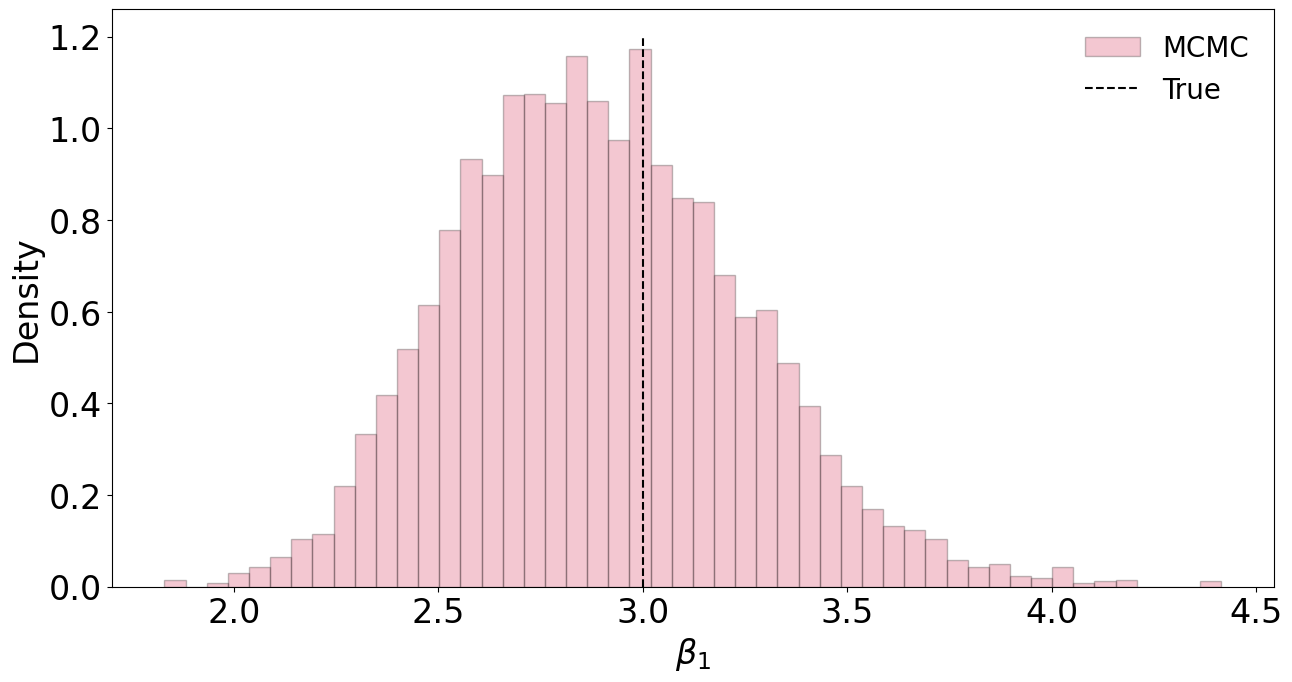

In [153]:
plt.hist(samples['beta1'], color='#D3214BFF',ec='black',alpha=0.25,label='MCMC',density=True,bins=50)
plt.vlines(true_beta[1],0,1.2,color='black',ls='dashed',label='True')
plt.xlabel(r'$\beta_1$')
plt.ylabel('Density')
leg = plt.legend(fontsize='small',frameon=False)
#for lh in leg.legendHandles: lh.set_alpha(1)
#plt.savefig(fig_path+'logreg_mcmc_scatter.pdf', dpi=300, bbox_inches='tight')

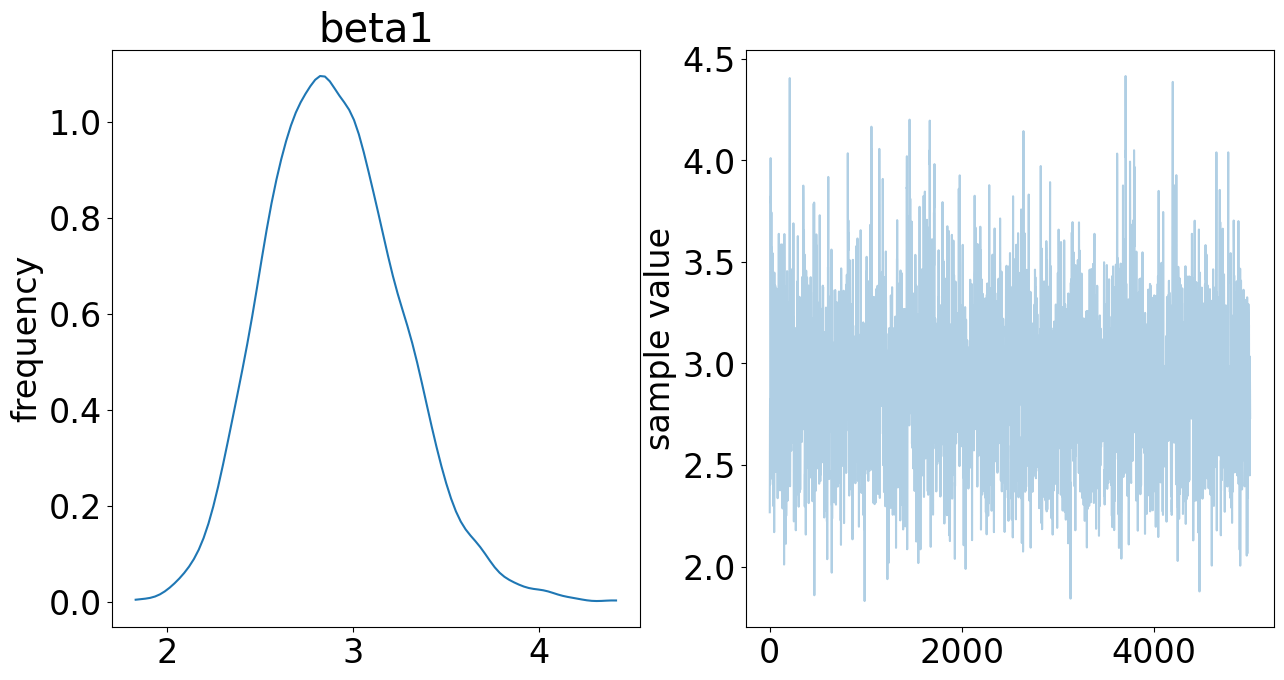

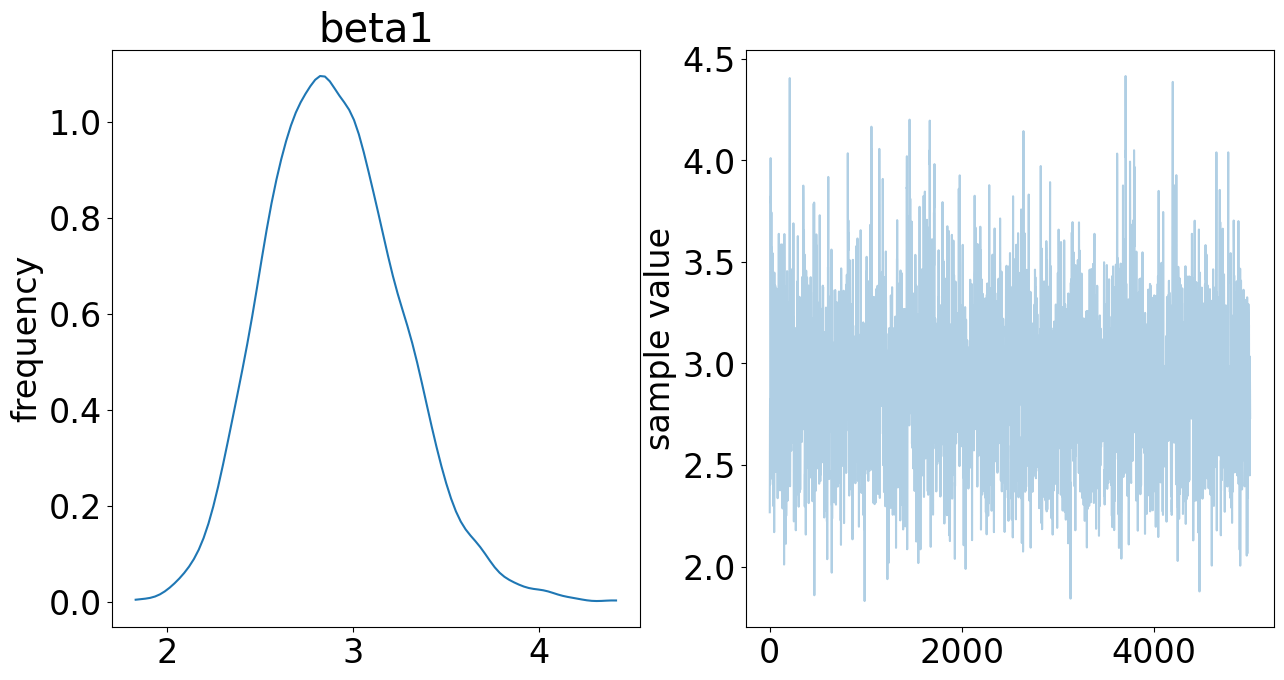

In [13]:
fit.plot()

## Fit variational approximations

In [14]:
# gaussian variational approximation
def lq(x,mu,logsigma):
    sigma=np.exp(logsigma)
    return -0.5*((x-mu)/sigma)**2-0.5*np.log(2*np.pi*sigma**2)

In [15]:
##########################
##########################
#    posterior defn     #
##########################
##########################
samples_beta1=samples['beta1']
def randp(size): return samples_beta1[:size] # just return the first size Stan samples

### Optimization

In [58]:
##########################
##########################
#    reverse KL opt      #
##########################
##########################

# optimization settings
np.random.seed(520)
max_iters=1001
B=1000 # monte carlo sample size for gradient estimation
lr_mu=1e-2
lr_lsigma=5*1e-2
divergence='rev-kl'

rev_mus,rev_lsigmas=vi.gaussianVI(lp,randp,divergence,B,max_iters,lr_mu,lr_lsigma)

Initial μ: -1.4109450484350377
Initial σ: 0.7555405048862535

Iter  |          μ          |          σ          |      μ gradient     |   logσ gradient
  0   | -0.2510030901622524   | 1.7646326559470649   | -115.99419582727853  | -16.965288542754436
  100   | 2.7352284427305076   | 0.17144908099813375   | -6.806249225668134  | 1.4985540643059512
  200   | 2.7639263284408173   | 0.21574939456020376   | -0.2928318751209313  | 0.5445418603710672
  300   | 2.7902332264480174   | 0.23814809683174737   | -0.5709407607110506  | -0.07856252554463344
  400   | 2.806651733611768   | 0.25629781161190096   | -2.6778068701482476  | -1.1900353960151613
  500   | 2.8369322863282056   | 0.2849705138708646   | 1.8662602011450722  | -0.4761353936851224
  600   | 2.850899272164129   | 0.3088647052965438   | -2.556846743361567  | -0.41286717557076885
  700   | 2.8632769879533995   | 0.32859307157623   | -4.930892781511368  | -1.081548101778971
  800   | 2.854089861611349   | 0.33021199237811216   | -0.154

In [59]:
# save optimal mean, lsigma values
# and define log pdf and sampler wrappers

rev_mu=rev_mus[-1]
rev_lsigma=rev_lsigmas[-1]

rev_lq = lambda x : vi.lq(x,rev_mu,rev_lsigma)
rev_randq = lambda B : rev_mu+np.exp(rev_lsigma)*np.random.randn(B)

In [51]:
##########################
##########################
#    forward KL opt      #
##########################
##########################

# optimization settings
np.random.seed(520)
max_iters=50001
B=5000 # monte carlo sample size for gradient estimation
lr_mu=1e-1
lr_lsigma=5*1e-2
divergence='fwd-kl'

fwd_mus,fwd_lsigmas=vi.gaussianVI(lp,randp,divergence,B,max_iters,lr_mu,lr_lsigma)

Initial μ: -1.4109450484350377
Initial σ: 0.7555405048862535

Iter  |          μ          |          σ          |      μ gradient     |   logσ gradient
  0   | -0.656510645833076   | 3.688849970860647   | -7.544344026019616  | -31.71273267637453
  5000   | 2.895679268591799   | 0.3671947161659404   | -1.6034809448228772e-09  | 0.059865615488587424
  10000   | 2.8956792688057282   | 0.35608125652591693   | -1.7307115740550217e-13  | 0.00018133098731186337
  15000   | 2.8956792688057282   | 0.3560493625810235   | -1.730938947730465e-13  | 2.0211553222779345e-06
  20000   | 2.8956792688057282   | 0.3560490111774375   | -1.730938947730465e-13  | 4.5634696108720617e-08
  25000   | 2.8956792688057282   | 0.3560490033469189   | -1.7311094779870472e-13  | 1.6178302018943214e-09
  30000   | 2.8956792688057282   | 0.3560490030731473   | -1.7311094779870472e-13  | 7.902150400695973e-11
  35000   | 2.8956792688057282   | 0.3560490030599651   | -1.7312231648247688e-13  | 4.931401065277896e-12
  400

In [60]:
# save optimal mean, lsigma values
# and define log pdf and sampler wrappers

fwd_mu=fwd_mus[-1]
fwd_lsigma=fwd_lsigmas[-1]

fwd_lq = lambda x : vi.lq(x,fwd_mu,fwd_lsigma)
fwd_randq = lambda B : fwd_mu+np.exp(fwd_lsigma)*np.random.randn(B)

### Diagnostics

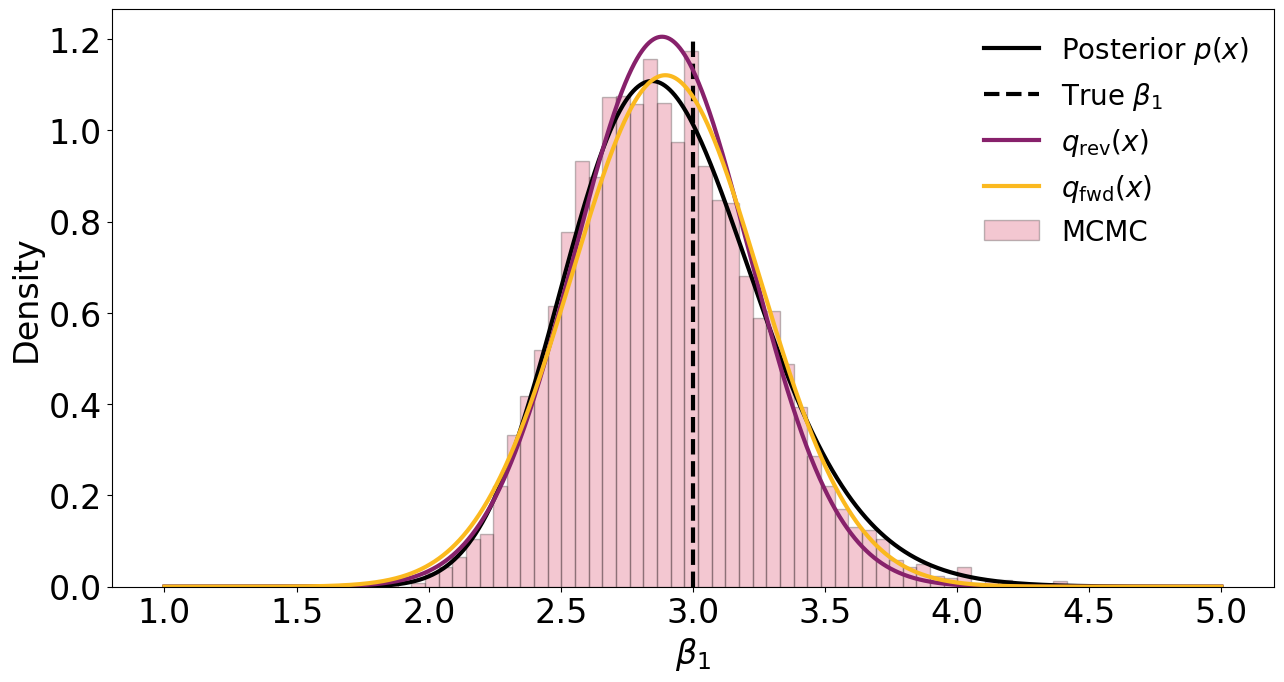

In [152]:
lsx=np.linspace(1,5,10000)
target=np.exp(lp(lsx))/Z
plt.plot(lsx,target,c="black", label=r'Posterior $p(x)$',lw=3)
plt.vlines(true_beta[1],0,1.2,color='black',ls='dashed',label=r'True $\beta_1$',lw=3)
plt.plot(lsx,np.exp(rev_lq(lsx)),c='#87216BFF', label=r'$q_{\mathrm{rev}}(x)$',lw=3)
plt.plot(lsx,np.exp(fwd_lq(lsx)),c='#FBB91FFF', label=r'$q_{\mathrm{fwd}}(x)$',lw=3)
plt.hist(samples['beta1'], color='#D3214BFF',ec='black',alpha=0.25,label='MCMC',density=True,bins=50)
plt.xlabel(r'$\beta_1$')
plt.ylabel('Density')
leg = plt.legend(fontsize='small',frameon=False)
plt.savefig(figpath + 'logreg_q.pdf', dpi=300, bbox_inches='tight')

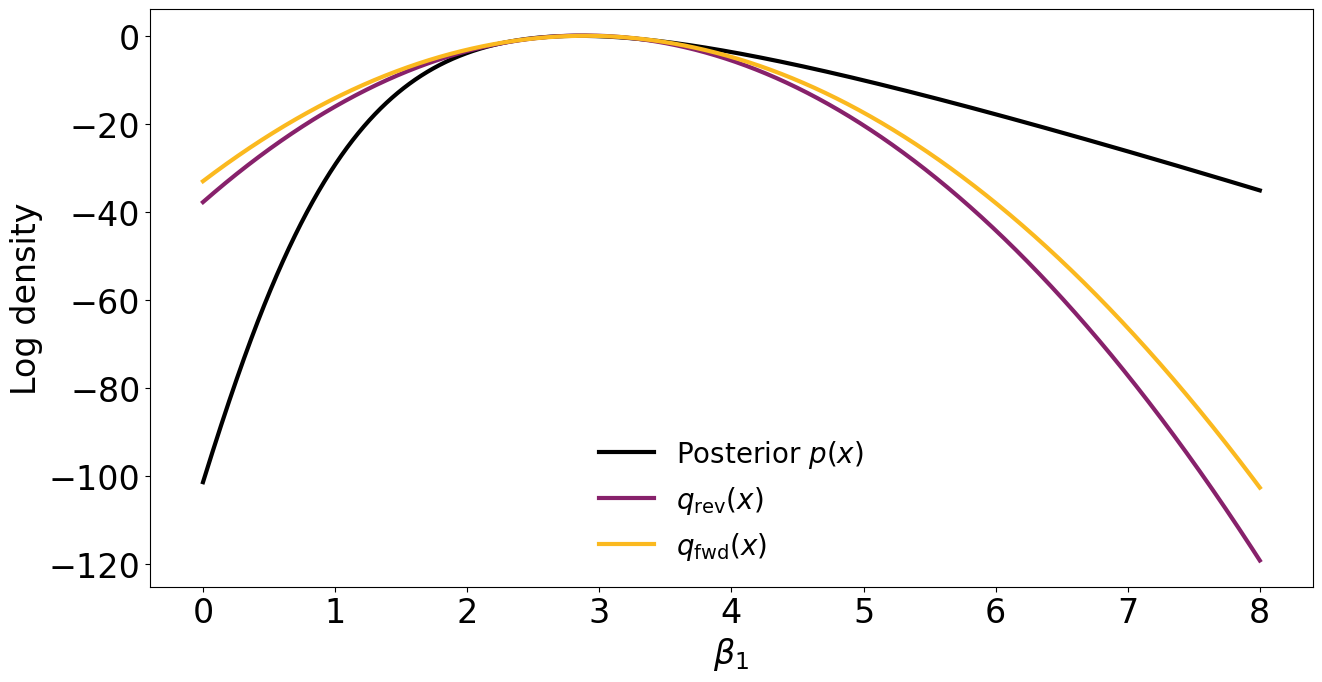

In [142]:
lsx=np.linspace(0,8,10000)
ltarget=lp(lsx)-np.log(Z)
plt.plot(lsx,ltarget,c="black", label=r'Posterior $p(x)$',lw=3)
plt.plot(lsx,rev_lq(lsx),c='#87216BFF', label=r'$q_{\mathrm{rev}}(x)$',lw=3)
plt.plot(lsx,fwd_lq(lsx),c='#FBB91FFF', label=r'$q_{\mathrm{fwd}}(x)$',lw=3)
plt.xlabel(r'$\beta_1$')
plt.ylabel('Log density')
leg = plt.legend(fontsize='small',frameon=False)
plt.savefig(figpath + 'logreg_logq.pdf', dpi=300, bbox_inches='tight')

In [143]:
alphas=np.flip(np.linspace(0.01,0.2,101)[1:])
lsx=np.linspace(0,8,10000)
target=np.exp(lp(lsx))
target_empirical=stats.rv_discrete(values=(lsx,target/np.sum(target)))
true_lims_low=target_empirical.ppf(alphas/2)
true_lims_high=target_empirical.ppf(1-alphas/2)
mcmc_empirical=stats.rv_discrete(values=(samples_beta1,np.ones(samples_beta1.shape[0])/samples_beta1.shape[0]))
mcmc_lims_low=mcmc_empirical.ppf(alphas/2)
mcmc_lims_high=mcmc_empirical.ppf(1-alphas/2)
rev_lims_low=stats.norm.ppf(alphas/2,loc=rev_mu,scale=np.exp(rev_lsigma))
rev_lims_high=stats.norm.ppf(1-alphas/2,loc=rev_mu,scale=np.exp(rev_lsigma))
fwd_lims_low=stats.norm.ppf(alphas/2,loc=fwd_mu,scale=np.exp(fwd_lsigma))
fwd_lims_high=stats.norm.ppf(1-alphas/2,loc=fwd_mu,scale=np.exp(fwd_lsigma))

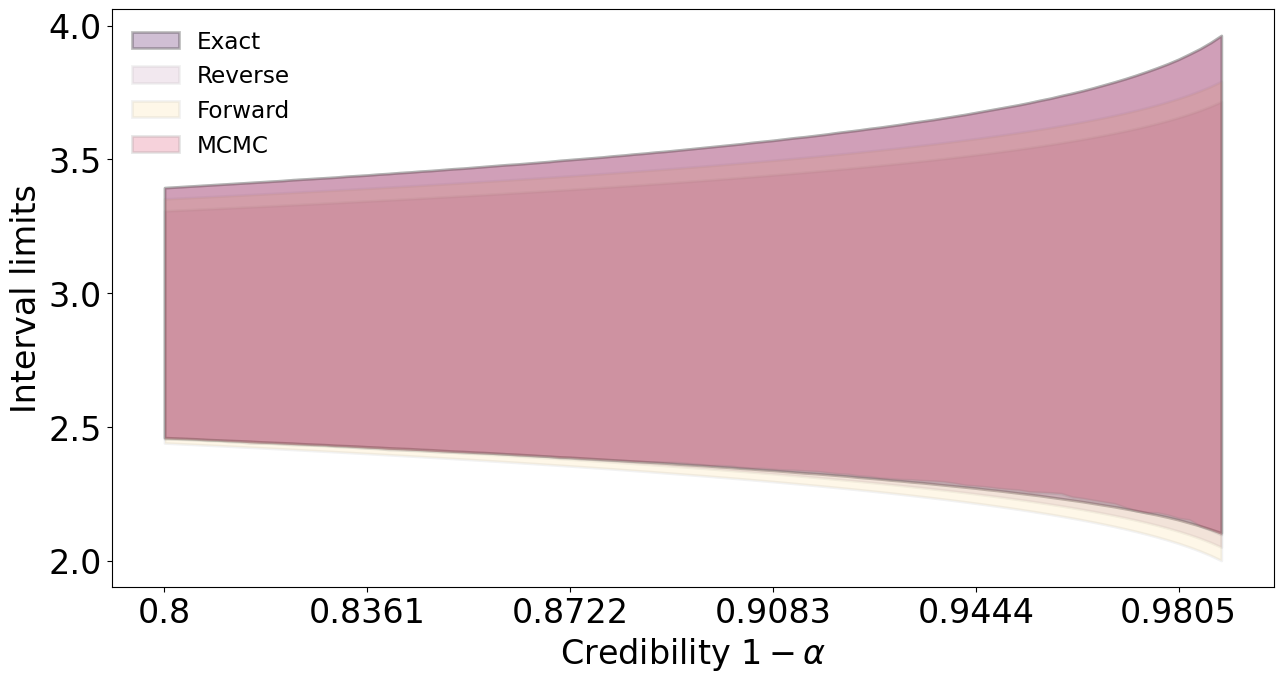

In [151]:
lsa=np.arange(0,alphas.shape[0])
#plt.errorbar(x=lsa,y=np.zeros(alphas.shape[0]),yerr=true_lims[1,:])
plt.fill_between(x=lsa,y1=true_lims_low,y2=true_lims_high,label='Exact',alpha=0.25,ec='black',lw=2, fc='#440154FF')
plt.fill_between(x=lsa,y1=rev_lims_low,y2=rev_lims_high,label='Reverse',alpha=0.1,ec='grey',lw=2,fc='#87216BFF')
plt.fill_between(x=lsa,y1=fwd_lims_low,y2=fwd_lims_high,label='Forward',alpha=0.1,ec='grey',lw=2,fc='#FBB91FFF')
plt.fill_between(x=lsa,y1=mcmc_lims_low,y2=true_lims_high,label='MCMC',alpha=0.2,ec='grey',lw=2,fc='#D3214BFF')
#plt.vlines(np.argmax(alphas==0.0499),-50,50,ls='dashed',color='red')

plt.ylabel('Interval limits')
plt.xlabel(r'Credibility $1-\alpha$')
plt.xticks(ticks=np.arange(0,100,step=19),labels=1-alphas[np.arange(0,100,step=19)])
plt.legend(fontsize='x-small',frameon=False,loc='upper left');

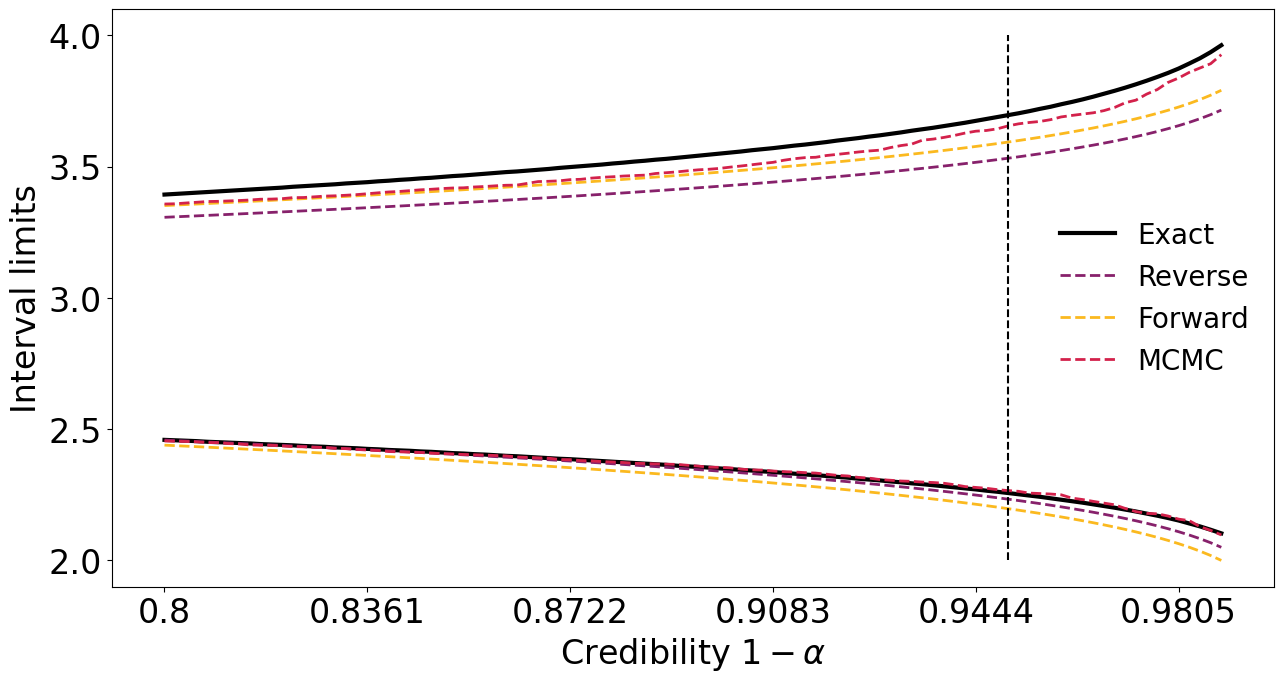

In [149]:
plt.plot(lsa,true_lims_low,label='Exact',c='black',lw=3)
plt.plot(lsa,true_lims_high,label='',c='black',lw=3)
plt.plot(lsa,rev_lims_low,label='Reverse',c='#87216BFF',lw=2,ls='dashed')
plt.plot(lsa,rev_lims_high,label='',c='#87216BFF',lw=2,ls='dashed')
plt.plot(lsa,fwd_lims_low,label='Forward',c='#FBB91FFF',lw=2,ls='dashed')
plt.plot(lsa,fwd_lims_high,label='',c='#FBB91FFF',lw=2,ls='dashed')
plt.plot(lsa,mcmc_lims_low,label='MCMC',c='#D3214BFF',lw=2,ls='dashed')
plt.plot(lsa,mcmc_lims_high,label='',c='#D3214BFF',lw=2,ls='dashed')
plt.vlines(np.argmax(alphas==0.0499),2,4,ls='dashed',color='black')

plt.ylabel('Interval limits')
plt.xlabel(r'Credibility $1-\alpha$')
plt.xticks(ticks=np.arange(0,100,step=19),labels=1-alphas[np.arange(0,100,step=19)])
plt.legend(fontsize='small',frameon=False,loc='center right');
plt.savefig(figpath + 'logreg_cilims.pdf', dpi=300, bbox_inches='tight')

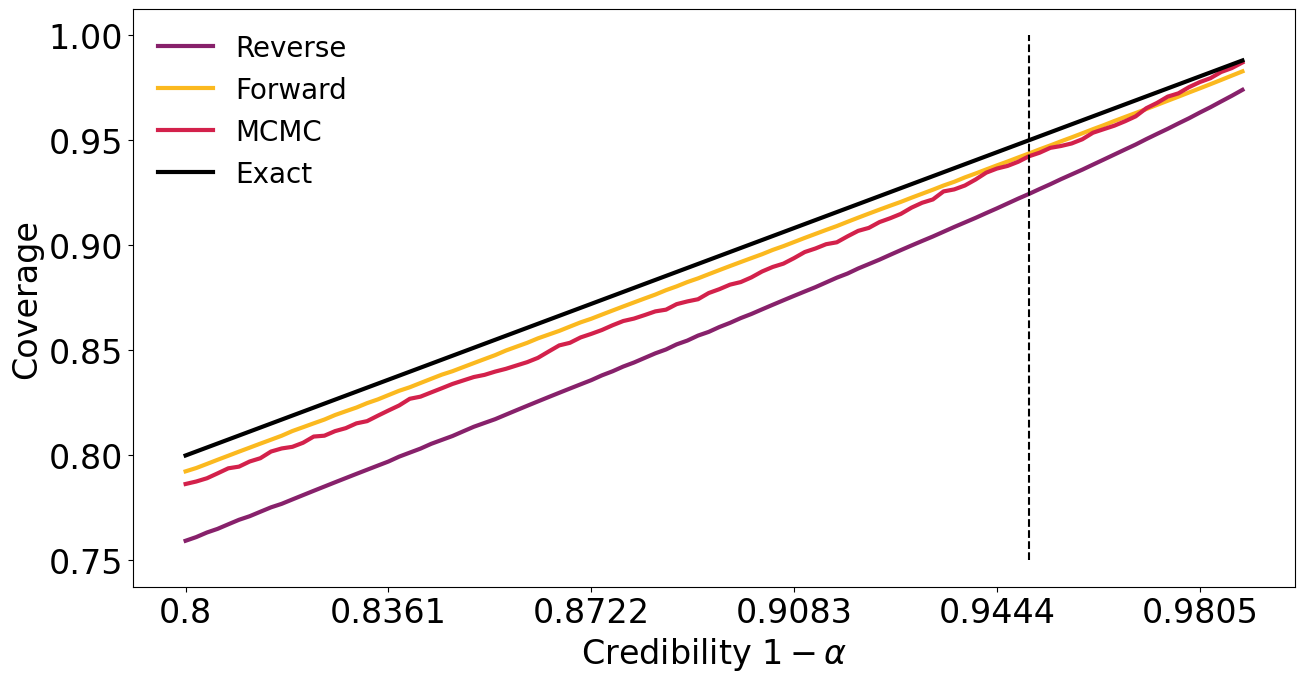

In [150]:
plt.plot(lsa,1-target_empirical.cdf(rev_lims_low)-target_empirical.sf(rev_lims_high),
         label='Reverse',lw=3,color='#87216BFF')
plt.plot(lsa,1-target_empirical.cdf(fwd_lims_low)-target_empirical.sf(fwd_lims_high),
         label='Forward',lw=3,color='#FBB91FFF')
plt.plot(lsa,1-target_empirical.cdf(mcmc_lims_low)-target_empirical.sf(mcmc_lims_high),
         label='MCMC',lw=3,color='#D3214BFF')
plt.plot(lsa,1-alphas[lsa],label='Exact',lw=3,color='black')
plt.vlines(np.argmax(alphas==0.0499),0.75,1,ls='dashed',color='black')

plt.ylabel(r'Coverage')
plt.xlabel(r'Credibility $1-\alpha$')
plt.xticks(ticks=np.arange(0,100,step=19),labels=1-alphas[np.arange(0,100,step=19)])
plt.legend(fontsize='small',frameon=False,loc='upper left');
plt.savefig(figpath + 'logreg_cicoverage.pdf', dpi=300, bbox_inches='tight')